In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [6]:
user_data = pd.read_csv('~/shared/homeworks/python_ds_miniprojects/3/user_data.csv')

In [7]:
logs = pd.read_csv('~/shared/homeworks/python_ds_miniprojects/3/logs.csv')

In [10]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [11]:
logs.shape

(4500, 4)

In [12]:
user_data.shape

(2954, 3)

In [13]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [14]:
logs['platform'].nunique()

3

In [15]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [57]:
successful_transactions = logs[logs['success'] == True]
successful_transactions

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
5,41928,True,phone,1585446772
...,...,...,...,...
4493,92584,True,computer,1585408896
4494,95152,True,computer,1585420263
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121


In [82]:
transactions_by_platform = successful_transactions.groupby('platform').count()
transactions_by_platform

,client,success,time
platform,,,
computer,1090,1090,1090
phone,2019,2019,2019
tablet,180,180,180


In [83]:
full_data = user_data.merge(logs, on='client')

In [84]:
full_data.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918


In [127]:
premium_client = full_data.query('premium == True')
no_premium_client = full_data.query('premium == False')
percent_premium_client = full_data.query('premium == True').count()/full_data.shape[0]
percent_no_premium_client = full_data.query('premium == False').count()/full_data.shape[0]

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping 

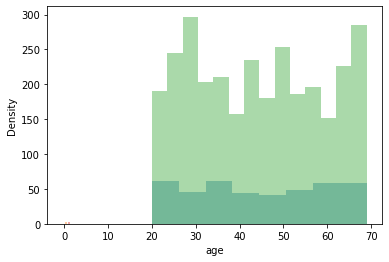

In [128]:
ax = sns.distplot(premium_client.age, kde=False)
ax = sns.distplot(percent_premium_client)
ax = sns.distplot(no_premium_client.age, kde=False)
ax = sns.distplot(percent_no_premium_client)


In [146]:
success_opertaion = full_data.query('success == True').groupby('client', as_index=False).agg({'success': 'sum'})
success_opertaion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2104 entries, 0 to 2103
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2104 non-null   int64
 1   success  2104 non-null   int64
dtypes: int64(2)
memory usage: 49.3 KB


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Распределение числа успешных операций')

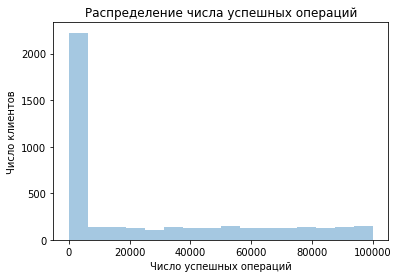

In [145]:
sns.distplot(success_opertaion, kde=False)
plt.xlabel('Число успешных операций')
plt.ylabel('Число клиентов')
plt.title('Распределение числа успешных операций')

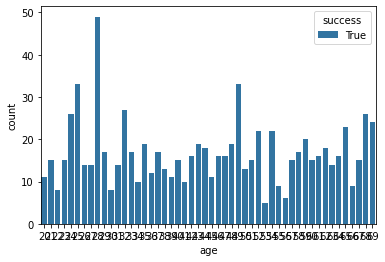

<Figure size 864x576 with 0 Axes>

In [167]:
df_computer = full_data[full_data['platform'] == 'computer']
df_computer = df_computer[df_computer['success'] == True]
sns.countplot(x='age', data=df_computer, hue='success')
plt.figure(figsize=(12, 8))
plt.savefig("myplot.png")

<Figure size 432x288 with 0 Axes>